# Graphing exposure data

In [1]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

## Attempt graphing over time

In [2]:
def lerp(start, end, t):
	r = start[0] + (end[0] - start[0]) * t
	g = start[1] + (end[1] - start[1]) * t
	b = start[2] + (end[2] - start[2]) * t
	a = start[3] + (end[3] - start[3]) * t
	return (r / 255.0, g / 255.0, b / 255.0, a)

import matplotlib.colors as mcolors

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [3]:
# 648 340
hex_list = ['#85ff00', '#fff100', '#ffaa04', '#ff0000', '#dc00ff', '#6700d4', '#1200db']#, '#0a014a']
scales = [0, 10, 100, 1000, 10000, 100000, 1000000]#, 10000000]
colors = [(0x85, 0xff, 0x00, 1.0), (0xff, 0xf1, 0x00, 1.0), (0xff, 0xaa, 0x04, 1.0), (0xff, 0x00, 0x00, 1.0), (0xdc, 0x00, 0xff, 1.0), (0x67, 0x00, 0xd4, 1.0), (0x12, 0x00, 0xdb, 1.0), (0x12, 0x00, 0xdb, 1.0)]#, (0x0a, 0x01, 0x4a, 1.0), ]

In [4]:
df = pd.read_csv('infected_by_infection.csv')

dates = sorted(list(df.date.unique()))
infection_names = list(df.infection.unique())

done = 0
output = {}
first_appearance = {}
for infection in infection_names:
	c = []
	for d in range(len(dates)):
		#print(dates[d], infection in list(df[(df.date == dates[d])]['infection']))
		if not infection in list(df[(df.date == dates[d])]['infection']) or df[(df.date == dates[d]) & (df.infection == infection)]['count'].iloc[0] == 0:
			c += [(0, 0, 0, 0)]
		else:
			first_appearance[infection] = dates[d]
			v = df[(df.date == dates[d]) & (df.infection == infection)]['count'].iloc[0]
			idx = -1
			for s in range(len(scales) - 1):
				if scales[s] < v and v <= scales[s+1]:
					idx = s
			if idx == -1:
				c += [lerp(colors[-1], colors[-1], 0.5)]
			else:
				c += [lerp(colors[idx], colors[idx+1], (v - scales[idx])/(scales[idx + 1] - scales[idx]))]
	done += 1
	print(f'{str(done).zfill(len(str(len(infection_names))))}/{len(infection_names)}: {infection}')
	output[infection] = c


001/104: CVE-2014-2321
002/104: CVE-2020-8958
003/104: SSV-97217
004/104: CVE-2020-8515
005/104: qsnatch
006/104: CVE-2020-5722
007/104: CVE-2009-0545
008/104: avalanche-dofoil
009/104: CVE-2016-6277
010/104: avalanche-trusteer-app
011/104: OPENVAS-1361412562310107187
012/104: dresscode
013/104: EDB-31683
014/104: android_spams
015/104: avalanche-smartapp
016/104: trickbot-iot-c2
017/104: marcher
018/104: avalanche-marcher
019/104: EDB-39596
020/104: CVE-2015-2051
021/104: CVE-2017-18368
022/104: EDB-41471
023/104: avalanche-trusteer
024/104: CVE-2016-10372
025/104: EDB-25978
026/104: CVE-2018-10562
027/104: CVE-2014-8361
028/104: CVE-2017-17215
029/104: flubot
030/104: vpnfilter
031/104: xcodeghost
032/104: unityminer
033/104: ghost-push
034/104: ssh-brute-force
035/104: telnet-brute-force
036/104: mirai
037/104: CVE-2020-10173
038/104: linux.backdoor.setag
039/104: android.digitime.fota
040/104: android.premiumtext
041/104: android.bankbot
042/104: dmsniff
043/104: android.banker.anu

In [5]:
from json import dumps
jsonified = dumps(output)
with open('./infected.json', 'w') as f:
    f.write(jsonified)
    f.close()

In [6]:
# Sort infection names initial date (color tuple not 0 0 0 0 ) then alphabetical
appearance = {}
for infection in infection_names:
    for c in range(len(output[infection])):
        if output[infection][c][0] != 0 or output[infection][c][1] != 0 or output[infection][c][2] != 0 or output[infection][c][3] != 0:
            appearance[infection] = c
            break

appearance_inv = {i: [] for i in range(len(dates))}
for v in sorted(list(appearance.items()), key=lambda x: x[1]):
    appearance_inv[v[1]] += [v[0]]

for i in range(len(dates)):
    if len(appearance_inv[i]) == 0:
        del(appearance_inv[i])
    else:
        appearance_inv[i] = sorted(appearance_inv[i])

infection_names_sorted = [x for xs in [v for k, v in appearance_inv.items()] for x in xs][::-1]

In [7]:
dates = sorted(list(df.date.unique()))
m_dates = mdates.num2date(mdates.datestr2num(dates))
m_dates[-1]

datetime.datetime(2022, 5, 4, 0, 0, tzinfo=datetime.timezone.utc)

In [8]:
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, LogNorm
norm=LogNorm(vmin=1, vmax=999999)
cmappable = ScalarMappable(norm=norm, cmap=get_continuous_cmap(hex_list=hex_list))

001/104: EDB-40500
002/104: CVE-2021-28151
003/104: CVE-2021-20166
004/104: CVE-2019-16920
005/104: CVE-2022-25075
006/104: CVE-2021-43711
007/104: CVE-2020-17456
008/104: CVE-2016-5674
009/104: CVE-2021-35327
010/104: CVE-2021-45382
011/104: CVE-2017-7927
012/104: CVE-2020-35665
013/104: CVE-2021-30168
014/104: CVE-2021-20090
015/104: CVE-2014-3206
016/104: EDB-42114
017/104: teleru
018/104: CVE-2011-5010 
019/104: CVE-2021-36260
020/104: CVE-2018-14839
021/104: EDB-49955
022/104: CVE-2017-14135
023/104: CVE-2013-2678
024/104: CVE-2020-35713
025/104: android.smssilence
026/104: android.bankspy
027/104: android.nitmo
028/104: CVE-2019-8387
029/104: CVE-2017-18046
030/104: CVE-2020-25506
031/104: CVE-2018-14558
032/104: CVE-2019-19824
033/104: CVE-2019-12725
034/104: android.opfake
035/104: android.milipnot
036/104: android.fobus
037/104: android.fakemart
038/104: android.fakedoc
039/104: poseidon
040/104: mkero
041/104: linux.backdoor.setag
042/104: kasidet
043/104: dmsniff
044/104: co

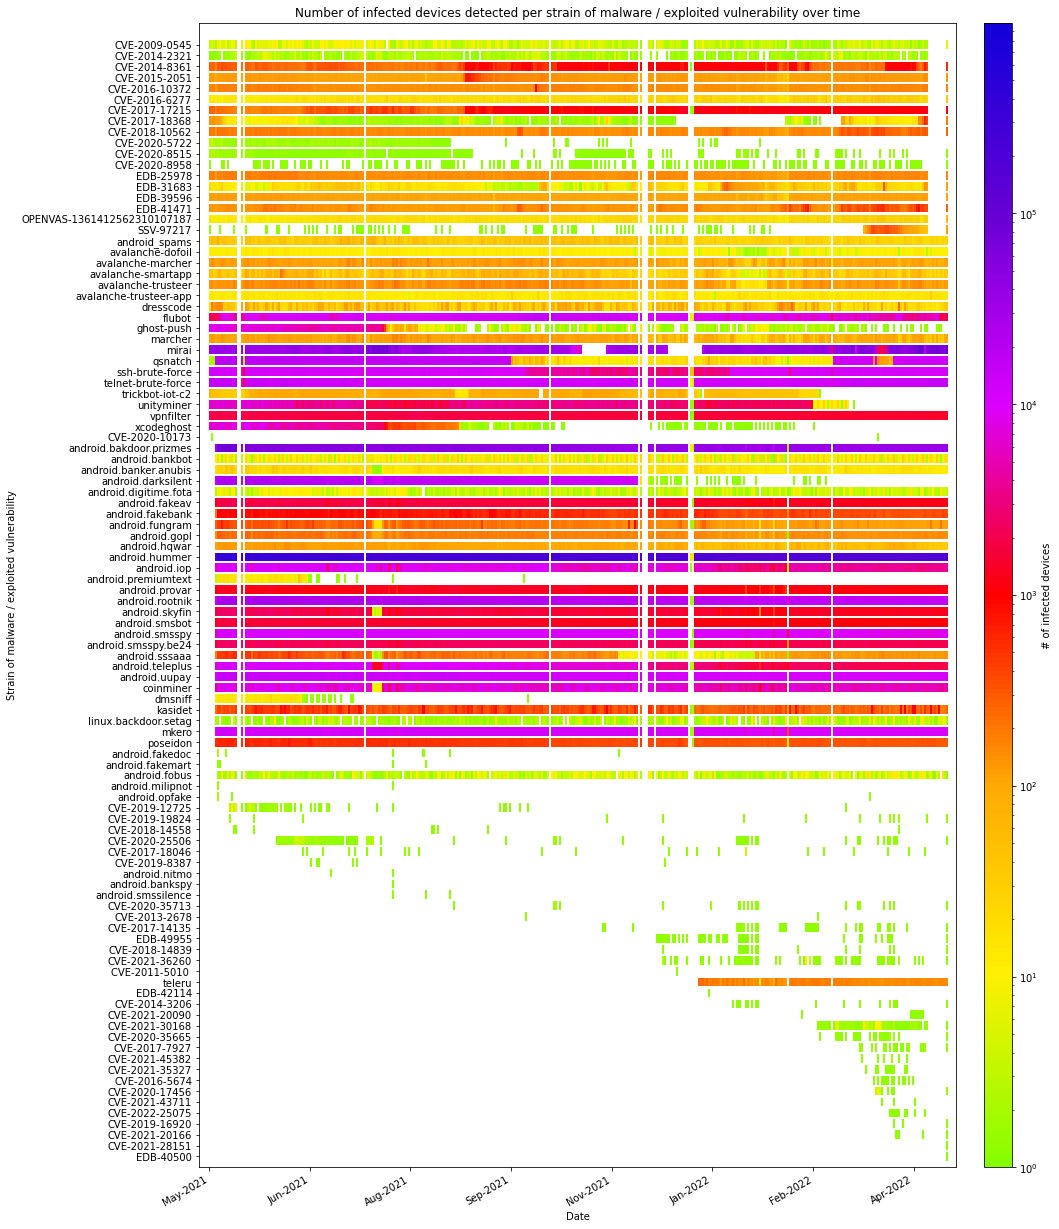

In [11]:
from datetime import timedelta

plt.rcParams["figure.figsize"] = (16.54, 23.38)

fig, ax = plt.subplots(figsize=(16.54, 23.38))
y = 0
done = 0

for infection in infection_names_sorted:
	for c in range(len(output[infection])):
		ax.barh(y, 1, left= m_dates[c], height=0.8, align='center', color=output[infection][c])
	y += 1
	done += 1
	print(f'{str(done).zfill(len(str(len(infection_names))))}/{len(infection_names)}: {infection}')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) 
ax.axis('tight')
ax.set_xlim([m_dates[0] - timedelta(days=5), m_dates[-1] + timedelta(days=5)])
ax.set_ylim([-1, len(infection_names_sorted)+1])
ax.set_yticks(np.arange(len(infection_names_sorted)))
ax.set_yticklabels(infection_names_sorted)

ax.set_xlabel('Date')
ax.set_ylabel('Strain of malware / exploited vulnerability')

fig.autofmt_xdate()

cb =fig.colorbar(cmappable, aspect=40, pad=0.03)
cb.ax.set_ylabel('# of infected devices')

ax.set_title("Number of infected devices detected per strain of malware / exploited vulnerability over time")

plt.savefig('../images/infections-better.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()